Libraries needed

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from datetime import datetime

Preparing dataset

In [ ]:
date_range = pd.date_range(start='1 jan 2020', end='31 march 2024')

In [ ]:
df = pd.DataFrame(date_range, columns=['Date'])

In [ ]:
df['Date'] = df['Date'].dt.strftime('%b %d, %Y')

In [ ]:
df.head()

,Date
0,"Jan 01, 2020"
1,"Jan 02, 2020"
2,"Jan 03, 2020"
3,"Jan 04, 2020"
4,"Jan 05, 2020"


In [ ]:
df['OVX Prices'] = None

In [ ]:
# Load the DataFrame from an Excel file
OVX = pd.read_csv('/content/OVX_final_data.csv')

In [ ]:
VIX = pd.read_csv('/content/VIX_final_data.csv')

In [ ]:
OVX.head()

,Date,Price
0,01-01-2020,152.200
1,02-01-2020,153.050
2,03-01-2020,155.950
3,04-01-2020,154.900
4,05-01-2020,154.375


In [ ]:
def convert_date(date_str):
    date_obj = datetime.strptime(date_str, "%d-%m-%Y")
    return date_obj.strftime("%b %d, %Y")

In [ ]:
OVX['Date'] = OVX['Date'].apply(convert_date)


In [ ]:
VIX['Date'] = VIX['Date'].apply(convert_date)

In [ ]:
OVX.head()

,Date,Price
0,"Jan 01, 2020",152.200
1,"Jan 02, 2020",153.050
2,"Jan 03, 2020",155.950
3,"Jan 04, 2020",154.900
4,"Jan 05, 2020",154.375


In [ ]:
# Create the dictionary mapping Date to Price
OVX_map = OVX.set_index(OVX.columns[0])[OVX.columns[1]].to_dict()

# Display the map
OVX_map

{'Jan 01, 2020': 152.2,
 'Jan 02, 2020': 153.05,
 'Jan 03, 2020': 155.95,
 'Jan 04, 2020': 154.9,
 'Jan 05, 2020': 154.375,
 'Jan 06, 2020': 153.85,
 'Jan 07, 2020': 154.45,
 'Jan 08, 2020': 154.9,
 'Jan 09, 2020': 156.4,
 'Jan 10, 2020': 157.9,
 'Jan 11, 2020': 158.025,
 'Jan 12, 2020': 158.0875,
 'Jan 13, 2020': 158.15,
 'Jan 14, 2020': 157.8,
 'Jan 15, 2020': 158.3,
 'Jan 16, 2020': 155.2,
 'Jan 17, 2020': 156.8,
 'Jan 18, 2020': 153.175,
 'Jan 19, 2020': 151.3625,
 'Jan 20, 2020': 149.55,
 'Jan 21, 2020': 145.9,
 'Jan 22, 2020': 137.65,
 'Jan 23, 2020': 138.45,
 'Jan 24, 2020': 142.15,
 'Jan 25, 2020': 141.725,
 'Jan 26, 2020': 141.5125,
 'Jan 27, 2020': 141.3,
 'Jan 28, 2020': 138.05,
 'Jan 29, 2020': 139.8,
 'Jan 30, 2020': 138.1,
 'Jan 31, 2020': 129.55,
 'Feb 01, 2020': 124.15,
 'Feb 02, 2020': 123.6,
 'Feb 03, 2020': 123.05,
 'Feb 04, 2020': 129.0,
 'Feb 05, 2020': 129.25,
 'Feb 06, 2020': 135.1,
 'Feb 07, 2020': 138.5,
 'Feb 08, 2020': 136.225,
 'Feb 09, 2020': 135.0875,
 'Fe

In [ ]:
VIX_map = VIX.set_index(VIX.columns[0])[VIX.columns[1]].to_dict()

# Display the map
VIX_map

{'Jan 01, 2020': 11.5975,
 'Jan 02, 2020': 11.49,
 'Jan 03, 2020': 12.695,
 'Jan 04, 2020': 13.73625,
 'Jan 05, 2020': 14.256875,
 'Jan 06, 2020': 14.7775,
 'Jan 07, 2020': 14.61,
 'Jan 08, 2020': 15.64,
 'Jan 09, 2020': 13.9975,
 'Jan 10, 2020': 14.0775,
 'Jan 11, 2020': 14.17625,
 'Jan 12, 2020': 14.225625,
 'Jan 13, 2020': 14.275,
 'Jan 14, 2020': 13.9125,
 'Jan 15, 2020': 14.12,
 'Jan 16, 2020': 14.1825,
 'Jan 17, 2020': 14.1275,
 'Jan 18, 2020': 14.76875,
 'Jan 19, 2020': 15.089375,
 'Jan 20, 2020': 15.41,
 'Jan 21, 2020': 15.8625,
 'Jan 22, 2020': 16.36,
 'Jan 23, 2020': 15.855,
 'Jan 24, 2020': 15.56,
 'Jan 25, 2020': 16.3675,
 'Jan 26, 2020': 16.77125,
 'Jan 27, 2020': 17.175,
 'Jan 28, 2020': 17.2975,
 'Jan 29, 2020': 16.4975,
 'Jan 30, 2020': 16.7975,
 'Jan 31, 2020': 17.3675,
 'Feb 01, 2020': 16.835,
 'Feb 02, 2020': 16.30875,
 'Feb 03, 2020': 15.7825,
 'Feb 04, 2020': 14.38,
 'Feb 05, 2020': 14.1725,
 'Feb 06, 2020': 13.78,
 'Feb 07, 2020': 13.7475,
 'Feb 08, 2020': 13.9787

In [ ]:
# Iterate over each row in df
for index, row in df.iterrows():
    date = row['Date']
    print(date)
    price = OVX_map.get(date)
    print(price)
    df.at[index, 'OVX Prices'] = price

Jan 01, 2020
152.2
Jan 02, 2020
153.05
Jan 03, 2020
155.95
Jan 04, 2020
154.9
Jan 05, 2020
154.375
Jan 06, 2020
153.85
Jan 07, 2020
154.45
Jan 08, 2020
154.9
Jan 09, 2020
156.4
Jan 10, 2020
157.9
Jan 11, 2020
158.025
Jan 12, 2020
158.0875
Jan 13, 2020
158.15
Jan 14, 2020
157.8
Jan 15, 2020
158.3
Jan 16, 2020
155.2
Jan 17, 2020
156.8
Jan 18, 2020
153.175
Jan 19, 2020
151.3625
Jan 20, 2020
149.55
Jan 21, 2020
145.9
Jan 22, 2020
137.65
Jan 23, 2020
138.45
Jan 24, 2020
142.15
Jan 25, 2020
141.725
Jan 26, 2020
141.5125
Jan 27, 2020
141.3
Jan 28, 2020
138.05
Jan 29, 2020
139.8
Jan 30, 2020
138.1
Jan 31, 2020
129.55
Feb 01, 2020
124.15
Feb 02, 2020
123.6
Feb 03, 2020
123.05
Feb 04, 2020
129.0
Feb 05, 2020
129.25
Feb 06, 2020
135.1
Feb 07, 2020
138.5
Feb 08, 2020
136.225
Feb 09, 2020
135.0875
Feb 10, 2020
133.95
Feb 11, 2020
134.25
Feb 12, 2020
136.05
Feb 13, 2020
134.1
Feb 14, 2020
130.25
Feb 15, 2020
130.075
Feb 16, 2020
129.9875
Feb 17, 2020
129.9
Feb 18, 2020
131.75
Feb 19, 2020
138.45
Feb

In [ ]:
df['VIX Prices'] = None

In [ ]:
for index, row in df.iterrows():
    date = row['Date']
    print(date)
    price = VIX_map.get(date)
    print(price)
    df.at[index, 'VIX Prices'] = price

Jan 01, 2020
11.5975
Jan 02, 2020
11.49
Jan 03, 2020
12.695
Jan 04, 2020
13.73625
Jan 05, 2020
14.256875
Jan 06, 2020
14.7775
Jan 07, 2020
14.61
Jan 08, 2020
15.64
Jan 09, 2020
13.9975
Jan 10, 2020
14.0775
Jan 11, 2020
14.17625
Jan 12, 2020
14.225625
Jan 13, 2020
14.275
Jan 14, 2020
13.9125
Jan 15, 2020
14.12
Jan 16, 2020
14.1825
Jan 17, 2020
14.1275
Jan 18, 2020
14.76875
Jan 19, 2020
15.089375
Jan 20, 2020
15.41
Jan 21, 2020
15.8625
Jan 22, 2020
16.36
Jan 23, 2020
15.855
Jan 24, 2020
15.56
Jan 25, 2020
16.3675
Jan 26, 2020
16.77125
Jan 27, 2020
17.175
Jan 28, 2020
17.2975
Jan 29, 2020
16.4975
Jan 30, 2020
16.7975
Jan 31, 2020
17.3675
Feb 01, 2020
16.835
Feb 02, 2020
16.30875
Feb 03, 2020
15.7825
Feb 04, 2020
14.38
Feb 05, 2020
14.1725
Feb 06, 2020
13.78
Feb 07, 2020
13.7475
Feb 08, 2020
13.97875
Feb 09, 2020
14.094375
Feb 10, 2020
14.21
Feb 11, 2020
13.88
Feb 12, 2020
13.6225
Feb 13, 2020
13.37
Feb 14, 2020
13.615
Feb 15, 2020
14.015
Feb 16, 2020
14.215
Feb 17, 2020
14.415
Feb 18, 202

In [ ]:
df


,Date,OVX Prices,VIX Prices
0,"Jan 01, 2020",152.2,11.5975
1,"Jan 02, 2020",153.05,11.49
2,"Jan 03, 2020",155.95,12.695
3,"Jan 04, 2020",154.9,13.73625
4,"Jan 05, 2020",154.375,14.256875
...,...,...,...
1547,"Mar 27, 2024",544.264038,16.47554
1548,"Mar 28, 2024",539.856262,16.45689
1549,"Mar 29, 2024",535.443603,16.437162
1550,"Mar 30, 2024",530.944763,16.423655


In [ ]:
df

,Date,OVX Prices,VIX Prices
0,"Jan 01, 2020",152.2,11.5975
1,"Jan 02, 2020",153.05,11.49
2,"Jan 03, 2020",155.95,12.695
3,"Jan 04, 2020",154.9,13.73625
4,"Jan 05, 2020",154.375,14.256875
...,...,...,...
1547,"Mar 27, 2024",544.264038,16.47554
1548,"Mar 28, 2024",539.856262,16.45689
1549,"Mar 29, 2024",535.443603,16.437162
1550,"Mar 30, 2024",530.944763,16.423655


In [ ]:
epu_df = pd.read_csv('/content/EPU_final_data.csv')

In [ ]:
epu_df.head()

,index,Value
0,01-01-2020,48.135430
1,02-01-2020,48.163514
2,03-01-2020,48.191599
3,04-01-2020,48.219683
4,05-01-2020,48.247767


In [ ]:
def convert_dates(date_str):
    date_obj = datetime.strptime(date_str, "%Y-%m-%d")
    return date_obj.strftime("%b %d, %Y")

In [ ]:
epu_df['index'] = epu_df['index'].apply(convert_date)

In [ ]:
epu_df.head()

,index,Value
0,"Jan 01, 2020",48.135430
1,"Jan 02, 2020",48.163514
2,"Jan 03, 2020",48.191599
3,"Jan 04, 2020",48.219683
4,"Jan 05, 2020",48.247767


In [ ]:
EPU_map = epu_df.set_index(epu_df.columns[0])[epu_df.columns[1]].to_dict()

# Display the map
EPU_map

{'Jan 01, 2020': 48.13543,
 'Jan 02, 2020': 48.1635143,
 'Jan 03, 2020': 48.1915986,
 'Jan 04, 2020': 48.21968289,
 'Jan 05, 2020': 48.24776719,
 'Jan 06, 2020': 48.27585149,
 'Jan 07, 2020': 48.30393579,
 'Jan 08, 2020': 48.33202008,
 'Jan 09, 2020': 48.36010438,
 'Jan 10, 2020': 48.38818868,
 'Jan 11, 2020': 48.41627298,
 'Jan 12, 2020': 48.44435727,
 'Jan 13, 2020': 48.47244157,
 'Jan 14, 2020': 48.50052587,
 'Jan 15, 2020': 48.52861017,
 'Jan 16, 2020': 48.55669447,
 'Jan 17, 2020': 48.58477876,
 'Jan 18, 2020': 48.61286306,
 'Jan 19, 2020': 48.64094736,
 'Jan 20, 2020': 48.66903166,
 'Jan 21, 2020': 48.69711595,
 'Jan 22, 2020': 48.72520025,
 'Jan 23, 2020': 48.75328455,
 'Jan 24, 2020': 48.78136885,
 'Jan 25, 2020': 48.80945314,
 'Jan 26, 2020': 48.83753744,
 'Jan 27, 2020': 48.86562174,
 'Jan 28, 2020': 48.89370604,
 'Jan 29, 2020': 48.92179034,
 'Jan 30, 2020': 48.94987463,
 'Jan 31, 2020': 48.97795893,
 'Feb 01, 2020': 92.64916,
 'Feb 02, 2020': 92.64856277,
 'Feb 03, 2020': 9

In [ ]:
df['EPU'] = None

In [ ]:
for index, row in df.iterrows():
    date = row['Date']
    print(date)
    price = EPU_map.get(date)
    print(price)
    df.at[index, 'EPU'] = price

Jan 01, 2020
48.13543
Jan 02, 2020
48.1635143
Jan 03, 2020
48.1915986
Jan 04, 2020
48.21968289
Jan 05, 2020
48.24776719
Jan 06, 2020
48.27585149
Jan 07, 2020
48.30393579
Jan 08, 2020
48.33202008
Jan 09, 2020
48.36010438
Jan 10, 2020
48.38818868
Jan 11, 2020
48.41627298
Jan 12, 2020
48.44435727
Jan 13, 2020
48.47244157
Jan 14, 2020
48.50052587
Jan 15, 2020
48.52861017
Jan 16, 2020
48.55669447
Jan 17, 2020
48.58477876
Jan 18, 2020
48.61286306
Jan 19, 2020
48.64094736
Jan 20, 2020
48.66903166
Jan 21, 2020
48.69711595
Jan 22, 2020
48.72520025
Jan 23, 2020
48.75328455
Jan 24, 2020
48.78136885
Jan 25, 2020
48.80945314
Jan 26, 2020
48.83753744
Jan 27, 2020
48.86562174
Jan 28, 2020
48.89370604
Jan 29, 2020
48.92179034
Jan 30, 2020
48.94987463
Jan 31, 2020
48.97795893
Feb 01, 2020
92.64916
Feb 02, 2020
92.64856277
Feb 03, 2020
92.64796554
Feb 04, 2020
92.64736831
Feb 05, 2020
92.64677108
Feb 06, 2020
92.64617385
Feb 07, 2020
92.64557662
Feb 08, 2020
92.64497939
Feb 09, 2020
92.64438216
Feb 10, 

In [ ]:
df

,Date,OVX Prices,VIX Prices,EPU
0,"Jan 01, 2020",152.2,11.5975,48.13543
1,"Jan 02, 2020",153.05,11.49,48.163514
2,"Jan 03, 2020",155.95,12.695,48.191599
3,"Jan 04, 2020",154.9,13.73625,48.219683
4,"Jan 05, 2020",154.375,14.256875,48.247767
...,...,...,...,...
1547,"Mar 27, 2024",544.264038,16.47554,91.72226
1548,"Mar 28, 2024",539.856262,16.45689,91.72226
1549,"Mar 29, 2024",535.443603,16.437162,91.72226
1550,"Mar 30, 2024",530.944763,16.423655,91.72226


In [ ]:
SILVER = pd.read_csv('/content/HZNC_final_data.csv')
SILVER.head()


,Date,Price
0,01-01-2020,210.10
1,02-01-2020,214.15
2,03-01-2020,215.25
3,04-01-2020,213.55
4,05-01-2020,212.70


In [ ]:
original_df = df

In [ ]:
df = df.drop(df.index[:30])
df

,Date,OVX Prices,VIX Prices,EPU
30,"Jan 31, 2020",129.55,17.3675,48.977959
31,"Feb 01, 2020",124.15,16.835,92.64916
32,"Feb 02, 2020",123.6,16.30875,92.648563
33,"Feb 03, 2020",123.05,15.7825,92.647966
34,"Feb 04, 2020",129.0,14.38,92.647368
...,...,...,...,...
1547,"Mar 27, 2024",544.264038,16.47554,91.72226
1548,"Mar 28, 2024",539.856262,16.45689,91.72226
1549,"Mar 29, 2024",535.443603,16.437162,91.72226
1550,"Mar 30, 2024",530.944763,16.423655,91.72226


In [ ]:
JSW = pd.read_csv('/content/JSW_data_with_WAD_and_MA20 (2).csv')

In [ ]:
JSW.head()

,Date,Price,Open,High,Low,Vol.,Change %,WAD,MA20,MA10
0,01-04-2024,518.45,533.00,537.85,515.20,2.55M,-1.98%,-156.30,601.5325,590.675
1,28-03-2024,528.90,524.95,533.50,521.60,4.21M,2.37%,-145.85,596.5000,582.615
2,27-03-2024,516.65,513.30,527.00,513.30,3.17M,0.67%,-158.10,592.1675,572.635
3,26-03-2024,513.20,520.95,528.70,509.45,2.41M,-0.44%,-173.60,587.7825,562.350
4,22-03-2024,515.45,504.80,517.50,500.05,2.68M,2.16%,-158.20,583.3200,552.585


In [ ]:
df['WAD'] = None
df['MA20'] = None
df['MA10'] = None

In [ ]:
def convert_dates(date_str):
    date_obj = datetime.strptime(date_str, "%d-%m-%Y")
    return date_obj.strftime("%b %d, %Y")

In [ ]:
JSW['Date'] = JSW['Date'].apply(convert_date)

In [ ]:
SILVER['Date'] = SILVER['Date'].apply(convert_date)

In [ ]:
JSW.head(-50)

,Date,Price,Open,High,Low,Vol.,Change %,WAD,MA20,MA10
0,"Apr 01, 2024",518.45,533.00,537.85,515.20,2.55M,-1.98%,-156.30,601.5325,590.675
1,"Mar 28, 2024",528.90,524.95,533.50,521.60,4.21M,2.37%,-145.85,596.5000,582.615
2,"Mar 27, 2024",516.65,513.30,527.00,513.30,3.17M,0.67%,-158.10,592.1675,572.635
3,"Mar 26, 2024",513.20,520.95,528.70,509.45,2.41M,-0.44%,-173.60,587.7825,562.350
4,"Mar 22, 2024",515.45,504.80,517.50,500.05,2.68M,2.16%,-158.20,583.3200,552.585
...,...,...,...,...,...,...,...,...,...,...
1001,"Mar 18, 2020",42.00,44.00,46.70,34.75,2.10M,-1.18%,-579.05,43.4450,44.715
1002,"Mar 17, 2020",42.50,45.70,45.70,41.40,2.74M,-6.90%,-577.95,43.4025,44.695
1003,"Mar 16, 2020",45.65,47.90,47.90,42.10,1.65M,-4.80%,-574.40,43.5450,44.870
1004,"Mar 13, 2020",47.95,46.00,49.75,42.50,1.11M,3.90%,-568.95,43.8675,45.225


In [ ]:
SILVER_Map = SILVER.set_index(SILVER.columns[0])[SILVER.columns[1]].to_dict()
SILVER_Map

{'Jan 01, 2020': 210.1,
 'Jan 02, 2020': 214.15,
 'Jan 03, 2020': 215.25,
 'Jan 04, 2020': 213.55,
 'Jan 05, 2020': 212.7,
 'Jan 06, 2020': 211.85,
 'Jan 07, 2020': 213.05,
 'Jan 08, 2020': 211.0,
 'Jan 09, 2020': 213.25,
 'Jan 10, 2020': 219.1,
 'Jan 11, 2020': 217.45,
 'Jan 12, 2020': 216.625,
 'Jan 13, 2020': 215.8,
 'Jan 14, 2020': 214.05,
 'Jan 15, 2020': 215.35,
 'Jan 16, 2020': 215.75,
 'Jan 17, 2020': 216.95,
 'Jan 18, 2020': 216.65,
 'Jan 19, 2020': 216.5,
 'Jan 20, 2020': 216.35,
 'Jan 21, 2020': 212.4,
 'Jan 22, 2020': 209.2,
 'Jan 23, 2020': 208.65,
 'Jan 24, 2020': 207.85,
 'Jan 25, 2020': 204.425,
 'Jan 26, 2020': 202.7125,
 'Jan 27, 2020': 201.0,
 'Jan 28, 2020': 198.75,
 'Jan 29, 2020': 198.55,
 'Jan 30, 2020': 194.7,
 'Jan 31, 2020': 194.1,
 'Feb 01, 2020': 191.8,
 'Feb 02, 2020': 190.6,
 'Feb 03, 2020': 189.4,
 'Feb 04, 2020': 192.95,
 'Feb 05, 2020': 190.75,
 'Feb 06, 2020': 192.75,
 'Feb 07, 2020': 195.05,
 'Feb 08, 2020': 194.4,
 'Feb 09, 2020': 194.075,
 'Feb 10, 

In [ ]:
JSW_map = JSW.set_index(JSW.columns[0])[JSW.columns[1]].to_dict()

In [ ]:
JSW_map

{'Apr 01, 2024': 518.45,
 'Mar 28, 2024': 528.9,
 'Mar 27, 2024': 516.65,
 'Mar 26, 2024': 513.2,
 'Mar 22, 2024': 515.45,
 'Mar 21, 2024': 504.55,
 'Mar 20, 2024': 489.15,
 'Mar 19, 2024': 482.8,
 'Mar 18, 2024': 495.4,
 'Mar 15, 2024': 497.9,
 'Mar 14, 2024': 476.85,
 'Mar 13, 2024': 461.05,
 'Mar 12, 2024': 509.3,
 'Mar 11, 2024': 509.0,
 'Mar 07, 2024': 515.25,
 'Mar 06, 2024': 512.05,
 'Mar 05, 2024': 509.5,
 'Mar 04, 2024': 516.9,
 'Mar 02, 2024': 505.0,
 'Mar 01, 2024': 503.65,
 'Feb 29, 2024': 508.3,
 'Feb 28, 2024': 507.6,
 'Feb 27, 2024': 521.85,
 'Feb 26, 2024': 523.7,
 'Feb 23, 2024': 506.85,
 'Feb 22, 2024': 488.0,
 'Feb 21, 2024': 484.65,
 'Feb 20, 2024': 490.6,
 'Feb 19, 2024': 499.25,
 'Feb 16, 2024': 480.45,
 'Feb 15, 2024': 484.15,
 'Feb 14, 2024': 479.7,
 'Feb 13, 2024': 487.05,
 'Feb 12, 2024': 497.2,
 'Feb 09, 2024': 500.2,
 'Feb 08, 2024': 506.85,
 'Feb 07, 2024': 493.95,
 'Feb 06, 2024': 491.65,
 'Feb 05, 2024': 492.9,
 'Feb 02, 2024': 482.9,
 'Feb 01, 2024': 491

In [ ]:
WAD_map = JSW.set_index(JSW.columns[0])[JSW.columns[7]].to_dict()

In [ ]:
MA20_map = JSW.set_index(JSW.columns[0])[JSW.columns[8]].to_dict()

In [ ]:
MA10_map = JSW.set_index(JSW.columns[0])[JSW.columns[9]].to_dict()

In [ ]:
for index, row in df.iterrows():
    date = row['Date']
    # print(date)
    price = SILVER_Map.get(date)
    # print(price)
    df.at[index, 'SILVER'] = price

In [ ]:
for index, row in df.iterrows():
    date = row['Date']
    # print(date)
    price = WAD_map.get(date)
    # print(price)
    df.at[index, 'WAD'] = price


In [ ]:
for index, row in df.iterrows():
    date = row['Date']
    # print(date)
    price = MA20_map.get(date)
    # print(price)
    df.at[index, 'MA20'] = price


In [ ]:
for index, row in df.iterrows():
    date = row['Date']
    # print(date)
    price = MA10_map.get(date)
    # print(price)
    df.at[index, 'MA10'] = price


In [ ]:
df['JSW'] = None
for index, row in df.iterrows():
    date = row['Date']
    # print(date)
    price = JSW_map.get(date)
    # print(price)
    df.at[index, 'JSW'] = price

In [ ]:
df.head(-10)

,Date,OVX Prices,VIX Prices,EPU,WAD,MA20,MA10,SILVER,JSW
30,"Jan 31, 2020",129.55,17.3675,48.977959,-562.35,63.0725,63.34,194.100000,63.05
31,"Feb 01, 2020",124.15,16.835,92.64916,-563.35,62.785,63.395,191.800000,62.05
32,"Feb 02, 2020",123.6,16.30875,92.648563,None,None,None,190.600000,None
33,"Feb 03, 2020",123.05,15.7825,92.647966,-564.05,62.43,63.475,189.400000,61.9
34,"Feb 04, 2020",129.0,14.38,92.647368,-562.75,62.2025,63.6,192.950000,63.2
...,...,...,...,...,...,...,...,...,...
1537,"Mar 17, 2024",585.131836,16.690735,91.72226,None,None,None,341.447510,None
1538,"Mar 18, 2024",581.668762,16.667065,91.72226,-183.2,559.17,510.675,341.357239,495.4
1539,"Mar 19, 2024",577.938965,16.649387,91.72226,-197.6,565.735,519.27,341.317047,482.8
1540,"Mar 20, 2024",574.164307,16.616869,91.72226,-184.5,572.1675,529.295,341.237091,489.15


In [ ]:
df = df.dropna(subset = ['JSW'])

In [ ]:
df

,Date,OVX Prices,VIX Prices,EPU,WAD,MA20,MA10,SILVER,JSW
30,"Jan 31, 2020",129.55,17.3675,48.977959,-562.35,63.0725,63.34,194.100000,63.05
31,"Feb 01, 2020",124.15,16.835,92.64916,-563.35,62.785,63.395,191.800000,62.05
33,"Feb 03, 2020",123.05,15.7825,92.647966,-564.05,62.43,63.475,189.400000,61.9
34,"Feb 04, 2020",129.0,14.38,92.647368,-562.75,62.2025,63.6,192.950000,63.2
35,"Feb 05, 2020",129.25,14.1725,92.646771,-564.4,61.735,63.85,190.750000,61.9
...,...,...,...,...,...,...,...,...,...
1541,"Mar 21, 2024",570.266479,16.589806,91.72226,-169.1,578.5275,540.29,341.087524,504.55
1542,"Mar 22, 2024",566.177918,16.555141,91.72226,-158.2,583.32,552.585,340.948608,515.45
1546,"Mar 26, 2024",548.540588,16.49069,91.72226,-173.6,587.7825,562.35,340.319031,513.2
1547,"Mar 27, 2024",544.264038,16.47554,91.72226,-158.1,592.1675,572.635,340.104523,516.65


Train test Split and Pre-processing

In [ ]:
parameter = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 1]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=500, random_state=42)

In [ ]:
cv = GridSearchCV(rf_regressor, param_grid = parameter, cv=5, scoring='neg_mean_squared_error')

In [ ]:
def fill_na_with_mean(series):
    for i in range(1, len(series) - 1):
        if pd.isna(series[i]):
            series[i] = (series[i - 1] + series[i + 1]) / 2
    return series

In [ ]:
df['VIX Prices'] = fill_na_with_mean(df['VIX Prices'].values)

<ipython-input-199-28effec0c1e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VIX Prices'] = fill_na_with_mean(df['VIX Prices'].values)


In [ ]:
df['OVX Prices'] = fill_na_with_mean(df['OVX Prices'].values)

<ipython-input-200-1c0c50515614>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OVX Prices'] = fill_na_with_mean(df['OVX Prices'].values)


In [ ]:
df['SILVER'] = fill_na_with_mean(df['SILVER'].values)

<ipython-input-201-9b76aa09d427>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SILVER'] = fill_na_with_mean(df['SILVER'].values)


In [ ]:
df['EPU'] = fill_na_with_mean(df['EPU'].values)

<ipython-input-202-6e16252a476f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EPU'] = fill_na_with_mean(df['EPU'].values)


In [ ]:
X = df.iloc[:, 1:-1]

In [ ]:
X.head()

,OVX Prices,VIX Prices,EPU,WAD,MA20,MA10,SILVER
30,129.55,17.3675,48.977959,-562.35,63.0725,63.34,194.10
31,124.15,16.835,92.64916,-563.35,62.785,63.395,191.80
33,123.05,15.7825,92.647966,-564.05,62.43,63.475,189.40
34,129.0,14.38,92.647368,-562.75,62.2025,63.6,192.95
35,129.25,14.1725,92.646771,-564.4,61.735,63.85,190.75


In [ ]:
y = df.iloc[:, -1]

In [ ]:
y.head()

30    63.05
31    62.05
33     61.9
34     63.2
35     61.9
Name: JSW, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Support Vector Model

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Create the model
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the model
svm_model.fit(X_train, y_train)

# Make predictions
svm_pred = svm_model.predict(X_test)

# Calculate R-squared
svm_r2 = r2_score(y_test, svm_pred)

# Number of observations
n = len(y_test)

# Number of predictors (features)
p = X_test.shape[1]

# Calculate Adjusted R-squared
adjusted_r_squared = 1 - (1 - svm_r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r_squared}")

Adjusted R-squared: 0.9138779757754658


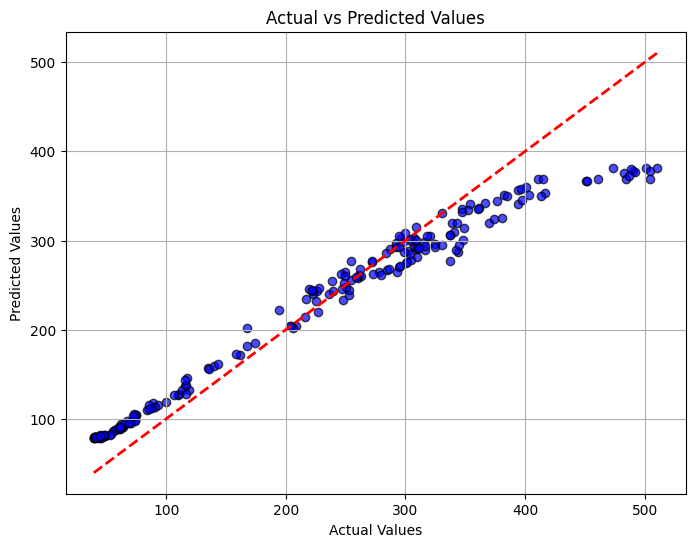

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, svm_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

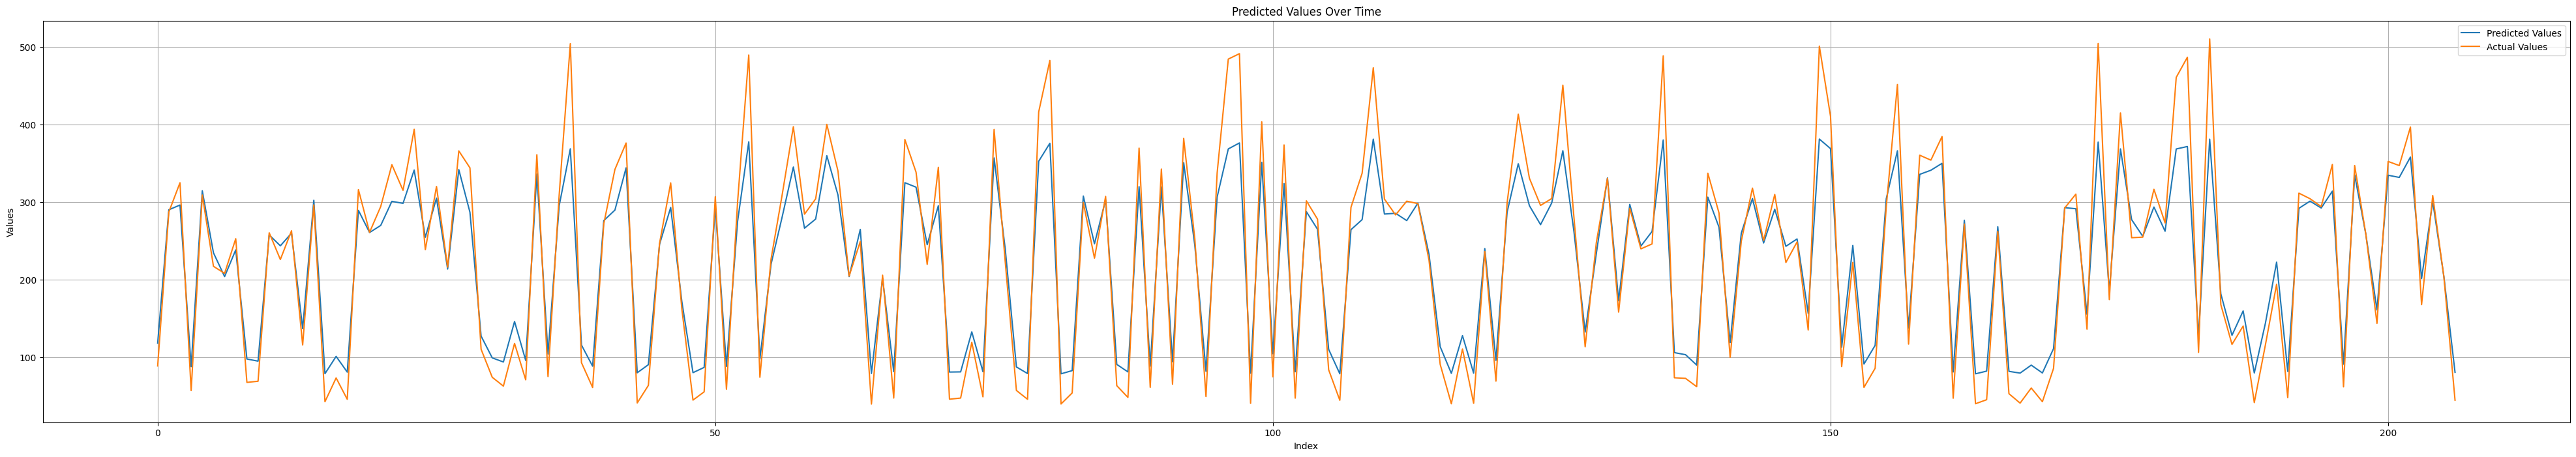

In [ ]:
# Line plot: Predicted Values Over Time
plt.figure(figsize=(50, 8))
# Assuming the correct sequence for your x-axis data
plt.plot(range(len(svm_pred)), svm_pred, label='Predicted Values')
plt.plot(range(len(y_test)), y_test, label='Actual Values')
plt.xlabel('Index')  # Change 'Index' to 'Date' if you have a date variable
plt.ylabel('Values')
plt.title('Predicted Values Over Time')
plt.legend()
plt.grid(True)
plt.show()

Random Forest

In [ ]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [ ]:
y_pred = rf_regressor.predict(X_test)

EVALUATION

In [ ]:
print(y_test.dtype)
print(y_pred.dtype)

object
float64


In [ ]:
# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


R^2 Score: 0.9964271380783225
Mean Squared Error: 66.15937470227233


In [ ]:
n = len(y_test)
p = X.shape[1]

r2 = r2_score(y_test, y_pred)
# Calculate Adjusted R-squared
adjusted_r_squared = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r_squared}")

Adjusted R-squared: 0.9963014595182635


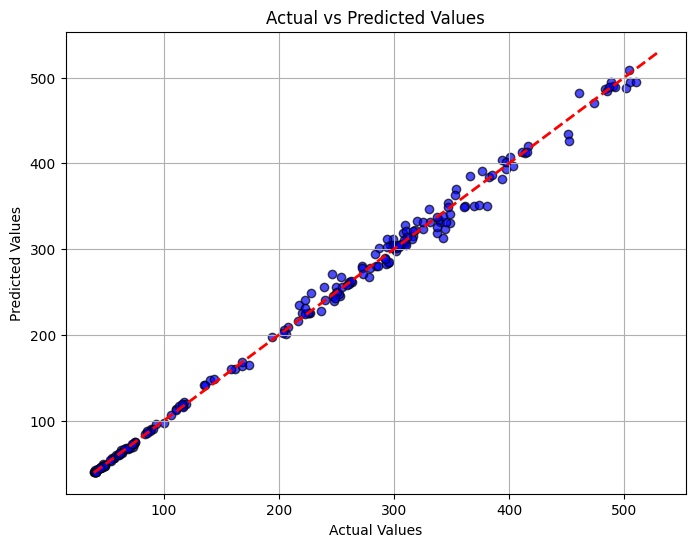

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

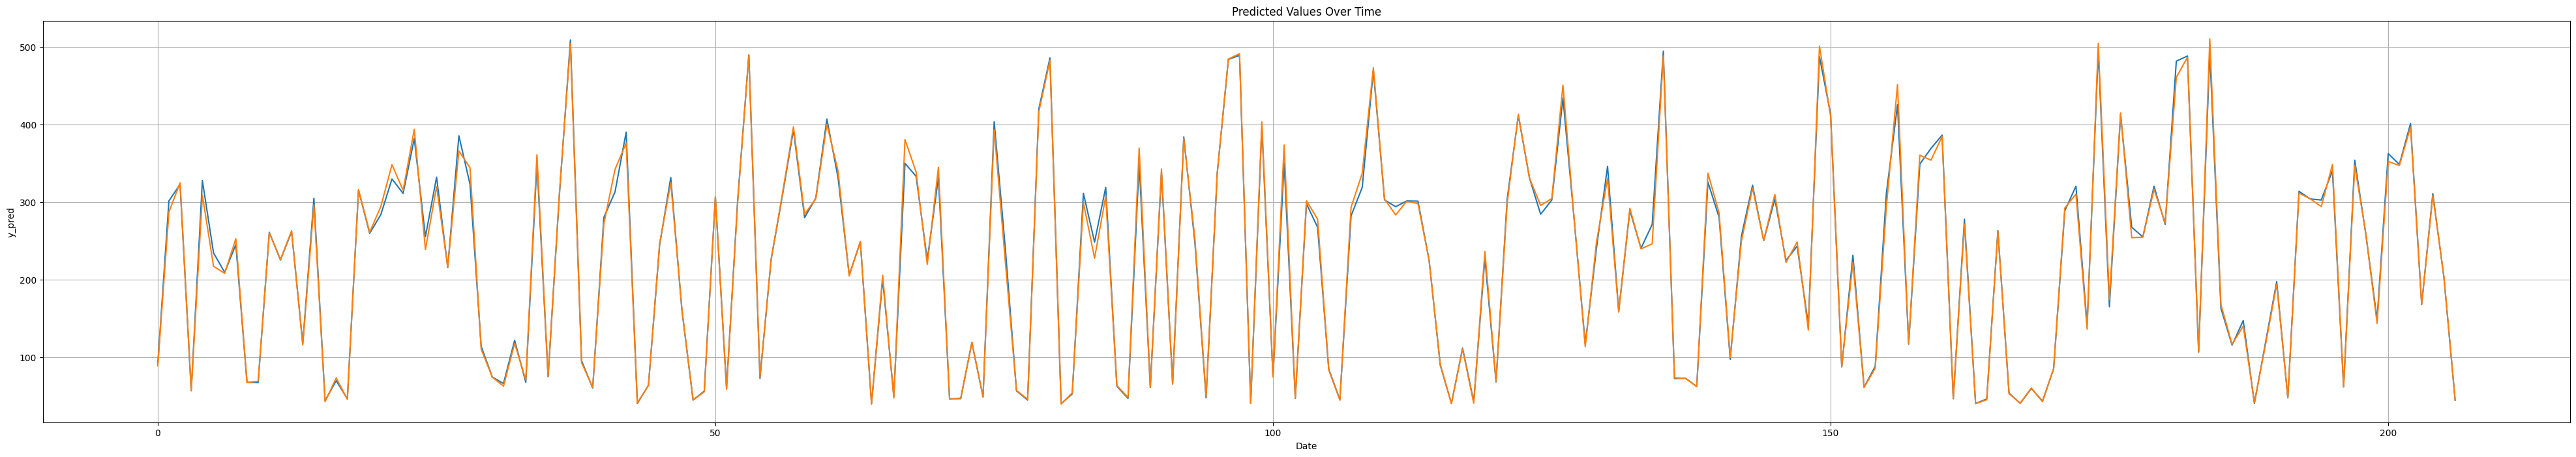

In [ ]:
# import matplotlib.pyplot as plt # Import the plotting library

plt.figure(figsize=(50, 8))
# Assuming 'date_variable' is the correct name for your x-axis data
plt.plot(range(len(y_pred)), y_pred)
plt.plot(range(len(y_test)), y_test)
plt.xlabel('Date')
plt.ylabel('y_pred')
plt.title('Predicted Values Over Time')
plt.grid(True)
plt.show()

SHAP VALUES


In [ ]:
!pip install shap
import shap

 98%|===================| 203/207 [00:25<00:00]       

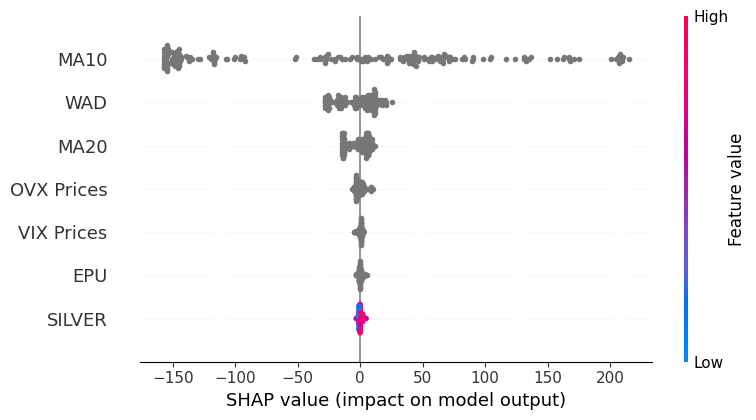

In [ ]:
# Assuming 'rf_regressor' is your trained model
# Convert X_test to numeric in the same way as X_train
X_test_numeric = X_test.apply(pd.to_numeric, errors='coerce')

# Generate SHAP values for X_test
explainer_test = shap.Explainer(rf_regressor, X_test_numeric)
shap_values_test = explainer_test(X_test_numeric, check_additivity=False)

# Create the summary plot using the correct SHAP values and feature matrix
shap.summary_plot(shap_values_test, X_test)

# Calculate correlation between SHAP values and features for X_test
shap_df = pd.DataFrame(shap_values_test.values, columns=X_test.columns)
correlation_matrix = shap_df.corr()

In [ ]:
correlation_matrix

,OVX Prices,VIX Prices,EPU,WAD,MA20,MA10,SILVER
OVX Prices,1.000000,0.023090,0.156394,0.676427,0.661610,0.757224,0.574782
VIX Prices,0.023090,1.000000,-0.055818,-0.072571,-0.089994,-0.042741,0.099445
EPU,0.156394,-0.055818,1.000000,0.231490,0.203237,0.140339,0.173426
WAD,0.676427,-0.072571,0.231490,1.000000,0.909812,0.863001,0.556020
MA20,0.661610,-0.089994,0.203237,0.909812,1.000000,0.737506,0.546506
MA10,0.757224,-0.042741,0.140339,0.863001,0.737506,1.000000,0.488985
SILVER,0.574782,0.099445,0.173426,0.556020,0.546506,0.488985,1.000000
